# Business Problem: 1
Perform sentimental analysis on the Elon-musk tweets

In [1]:
import pandas as pd
import numpy as np
import string
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from matplotlib.pyplot import imread
from wordcloud import WordCloud
get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib import pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
musk1 = pd.read_csv('Elon_musk.csv')

In [3]:
musk1

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
train,test = train_test_split(musk1,test_size=0.1)

In [5]:
train

,Unnamed: 0,Text
774,775,@TeslaNY @Tesla Happy to see this :)
1517,1518,Ms Tree catches fairing in her net https://t.c...
1634,1635,@Erdayastronaut @queue_max @NASASpaceflight I ...
1544,1545,"@AwardsDarwin Bold move, sir, bold move"
1025,1026,@Teslarati Great work by SpaceX valve engineer...
...,...,...
271,272,@iamdevloper https://t.co/BkKeiIicYe
600,601,RT @SpaceX: Crew-1�s view of Earth during Drag...
1650,1651,RT @NASASpaceflight: LAUNCH! Starship SN5 has ...
1357,1358,Great trip to Germany. Support from government...


In [6]:
test

,Unnamed: 0,Text
1228,1229,RT @CARandDRIVER: We drove a Model S Long Rang...
1652,1653,@austinbarnard45 Mars is looking real
420,421,"@Erdayastronaut Yup, we�re just ironing out a ..."
421,422,To Tesla owners taking delivery in the final d...
704,705,Astronaut launch today! https://t.co/3FAzZGss8c
...,...,...
610,611,@PhilippeCROIZON @SpaceX One day we will fly y...
1704,1705,@matfabrix @engineers_feed Things we take for ...
620,621,@ID_AA_Carmack Yup
870,871,@bluemoondance74 @SpacePadreIsle Some challeng...


### Clean Data

In [7]:
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

### Clean The Text

In [8]:
musk1["Text"] = musk1["Text"].apply(cleantext)
musk1.head()

,Unnamed: 0,Text
0,1,I�m an alien
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,3,Great interview!
3,4,Doge is underestimated
4,5,Congratulations Tesla China for amazing execu...


In [9]:
from textblob import TextBlob

## Get The Subjectivity

In [10]:
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

## Adding Subjectivity and Polarity

In [11]:
musk1[["subjectivity", "polarity"]] = musk1.apply(sentiment_analysis, axis=1)
musk1

,Unnamed: 0,Text,subjectivity,polarity
0,1,I�m an alien,0.750000,-0.250000
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,3,Great interview!,0.750000,1.000000
3,4,Doge is underestimated,0.000000,0.000000
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,1997,Samwise Gamgee,0.000000,0.000000
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


## EDA

### Data Visualization

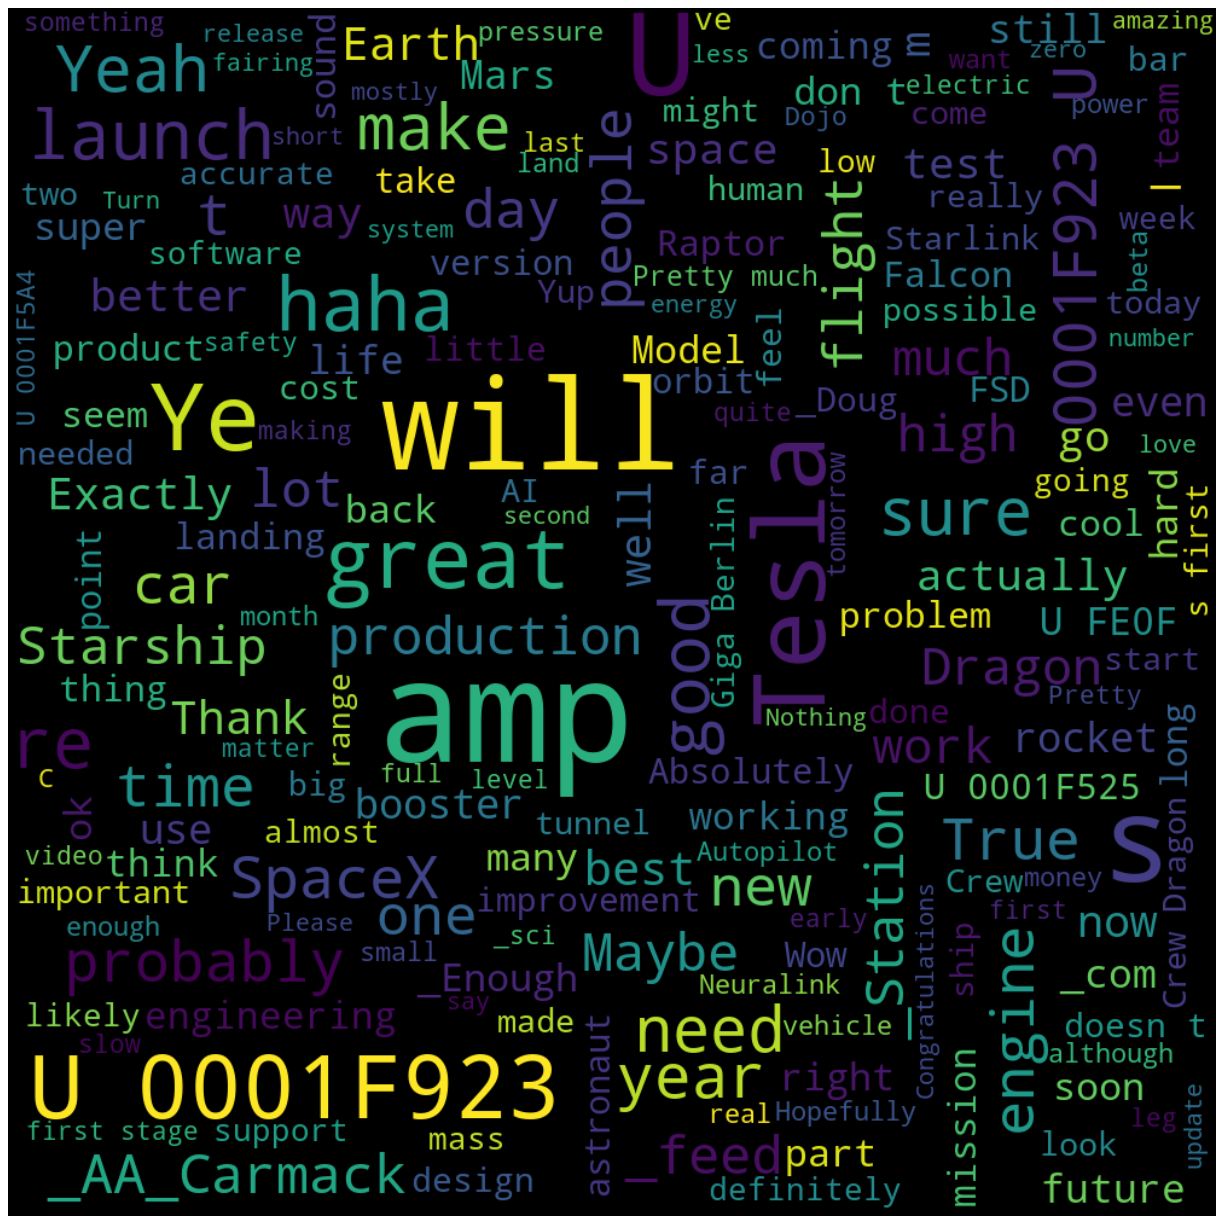

In [12]:
allwords = " ".join([twts for twts in musk1["Text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

### Compute The Negative, Neutral, Positive Analysis

In [13]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

## Create New Analysis Column

In [14]:
musk1["analysis"] = musk1["polarity"].apply(analysis)

In [15]:
musk1

,Unnamed: 0,Text,subjectivity,polarity,analysis
0,1,I�m an alien,0.750000,-0.250000,Negative
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,3,Great interview!,0.750000,1.000000,Positive
3,4,Doge is underestimated,0.000000,0.000000,Neutral
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,1997,Samwise Gamgee,0.000000,0.000000,Neutral
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative


In [16]:
positive_tweets = musk1[musk1['analysis'] == 'Positive']
negative_tweets = musk1[musk1['analysis'] == 'Negative']

In [17]:
print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
     print(' -' + row['Text'])

positive tweets
 -  Great interview!
 - Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!
 -Happy New Year of the Ox! 
 -_   Haha thanks :)
 -The most entertaining outcome is the most likely
negative tweets
 - I�m an alien
 - Your app sucks
 - _ Starlink is a staggeringly difficult technical &amp; economic endeavor. However, if we don� 
 - _ SpaceX needs to pass through a deep chasm of negative cash flow over the next year or� 
 - Everyone at Tesla receives stock. 

My comp is all stock/options, which I do not take off the table. 

That�s what you�re missing.


In [18]:
musk1 = musk1[['Text','analysis']]
musk1

,Text,analysis
0,I�m an alien,Negative
1,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,Neutral
2,Great interview!,Positive
3,Doge is underestimated,Neutral
4,Congratulations Tesla China for amazing execu...,Positive
...,...,...
1994,"True, it sounds so surreal, but the negative ...",Positive
1995,Make sure to read ur terms &amp; conditions b...,Positive
1996,Samwise Gamgee,Neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,Negative


In [19]:
musk1 = musk1[musk1['analysis']!= 'Neutral']
musk1

,Text,analysis
0,I�m an alien,Negative
2,Great interview!,Positive
4,Congratulations Tesla China for amazing execu...,Positive
5,Happy New Year of the Ox!,Positive
7,_ Haha thanks :),Positive
...,...,...
1989,"Sorry, should hopefully be soon!",Negative
1991,"No easy way to answer this in a tweet, but he...",Positive
1994,"True, it sounds so surreal, but the negative ...",Positive
1995,Make sure to read ur terms &amp; conditions b...,Positive


In [20]:
musk1.shape

(1100, 2)

In [21]:
musk1.dtypes

Text        object
analysis    object
dtype: object

In [22]:
musk1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1997
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      1100 non-null   object
 1   analysis  1100 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


### Data Preprocessing

In [23]:
train,test = train_test_split(musk1,test_size=0.1)

In [24]:
train

,Text,analysis
659,"Merlin is a strong local maximum design, but...",Positive
1943,_feed The strength &amp; perseverance of the ...,Negative
264,Suicide is more than double homicide,Positive
244,"Two of the engines need slight repairs, so ...",Negative
1104,"Pretty wild,�",Positive
...,...,...
436,Great game,Positive
950,"Wow, that would be quite a trip!",Positive
1670,Congratulations &amp; on completing first cr...,Positive
399,"_adri There are subtle, important, differenc...",Positive


In [25]:
test

,Text,analysis
1796,The song I whistle most is Strangers in the ...,Positive
1777,Great song\n,Positive
290,"Yes, but not for long",Negative
550,"For a second there, I thought that was a pic...",Positive
641,"_xD I was going to say �Sim!�, but that seeme...",Positive
...,...,...
707,_Soichi: SpaceX NASA Crew1 just finished final...,Positive
274,This is an important distinction,Positive
1397,"One person at Tesla (out of 60,000) was hos...",Negative
1430,Brave Starhopper carried the day,Positive


In [26]:
for val in train['Text']:
    print(val)

  Merlin is a strong local maximum design, but kerosene is suboptimal fuel, no matter what� 
 _feed The strength &amp; perseverance of the people of Tesla, despite facing extreme difficulties
 Suicide is more than double homicide 
   Two of the engines need slight repairs, so will be switched out
       Pretty wild,� 
 The Promise is greatly needed
 Have you read ? It�s great!!
If you�ve worked on advanced wearables, phones or robots, those skills are needed 
: Dragon separation confirmed; the spacecraft is on its way to the _station. Autonomous docking tomorrow at approximately 1�
: Splashdown of Dragon confirmed, completing SpaceX�s 21st _Station resupply mission and the first return of a cargo resupp�
A New Banner is needed
Neither hard left nor right
 Lithium is extremely common on Earth. Found almost everywhere.
 We will have special colors for new Roadster, as we did for the original
 [Some tyranny]. Also, the road to hell is mostly paved with bad intentions.
  Rocket motion is p

In [27]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [28]:
pattern = "(#\w+)|(RT\s@\w+:)|(http.*)|(@\w+)"

In [31]:
train['Text'][999]

' Limited FSD beta releasing on Tuesday next week, as promised. This will, at first, be limited to a s� '

In [32]:
def Clean_Text(musk1):
    Text = []
    analysis = []
    for index,row in musk1.iterrows():
        sentence = re.sub(pattern,'',row.Text)
        words = [e.lower() for e in sentence.split()]
        words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
        words = ' '.join(words)
        Text.append(words)
        analysis.append(row.analysis)
    return Text,analysis

In [33]:
train_Text,train_analysis = Clean_Text(train)

In [34]:
final_data = {'tweets':train_Text,'sentiments':train_analysis}
final_data

{'tweets': ['merlin strong local maximum design, kerosene suboptimal fuel, matter what�',
  '_feed strength &amp; perseverance people tesla, despite facing extreme difficulty',
  'suicide double homicide',
  'two engine need slight repairs, switched',
  'pretty wild,�',
  'promise greatly needed',
  'read ? it�s great!!',
  'you�ve worked advanced wearables, phone robots, skill needed',
  ': dragon separation confirmed; spacecraft way _station. autonomous docking tomorrow approximately 1�',
  ': splashdown dragon confirmed, completing spacex�s 21st _station resupply mission first return cargo resupp�',
  'new banner needed neither hard left right',
  'lithium extremely common earth. found almost everywhere.',
  'special color new roadster, original',
  '[some tyranny]. also, road hell mostly paved bad intentions.',
  'rocket motion primarily vertical, want top open',
  'law thermodynamics: 1. can�t win 2. can�t break even 3. can�t stop playing',
  'kinda love etsy',
  'blow ur mind hah

In [35]:
processed_data = pd.DataFrame(final_data)

In [36]:
processed_data

,tweets,sentiments
0,"merlin strong local maximum design, kerosene s...",Positive
1,_feed strength &amp; perseverance people tesla...,Negative
2,suicide double homicide,Positive
3,"two engine need slight repairs, switched",Negative
4,"pretty wild,�",Positive
...,...,...
985,great game,Positive
986,"wow, would quite trip!",Positive
987,congratulation &amp; completing first crewed d...,Positive
988,"_adri subtle, important, difference u &amp; ca...",Positive


### Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
processed_data['sentiments'] = labelencoder.fit_transform(processed_data['sentiments'])

In [38]:
processed_data

,tweets,sentiments
0,"merlin strong local maximum design, kerosene s...",1
1,_feed strength &amp; perseverance people tesla...,0
2,suicide double homicide,1
3,"two engine need slight repairs, switched",0
4,"pretty wild,�",1
...,...,...
985,great game,1
986,"wow, would quite trip!",1
987,congratulation &amp; completing first crewed d...,1
988,"_adri subtle, important, difference u &amp; ca...",1


### Data Visualization

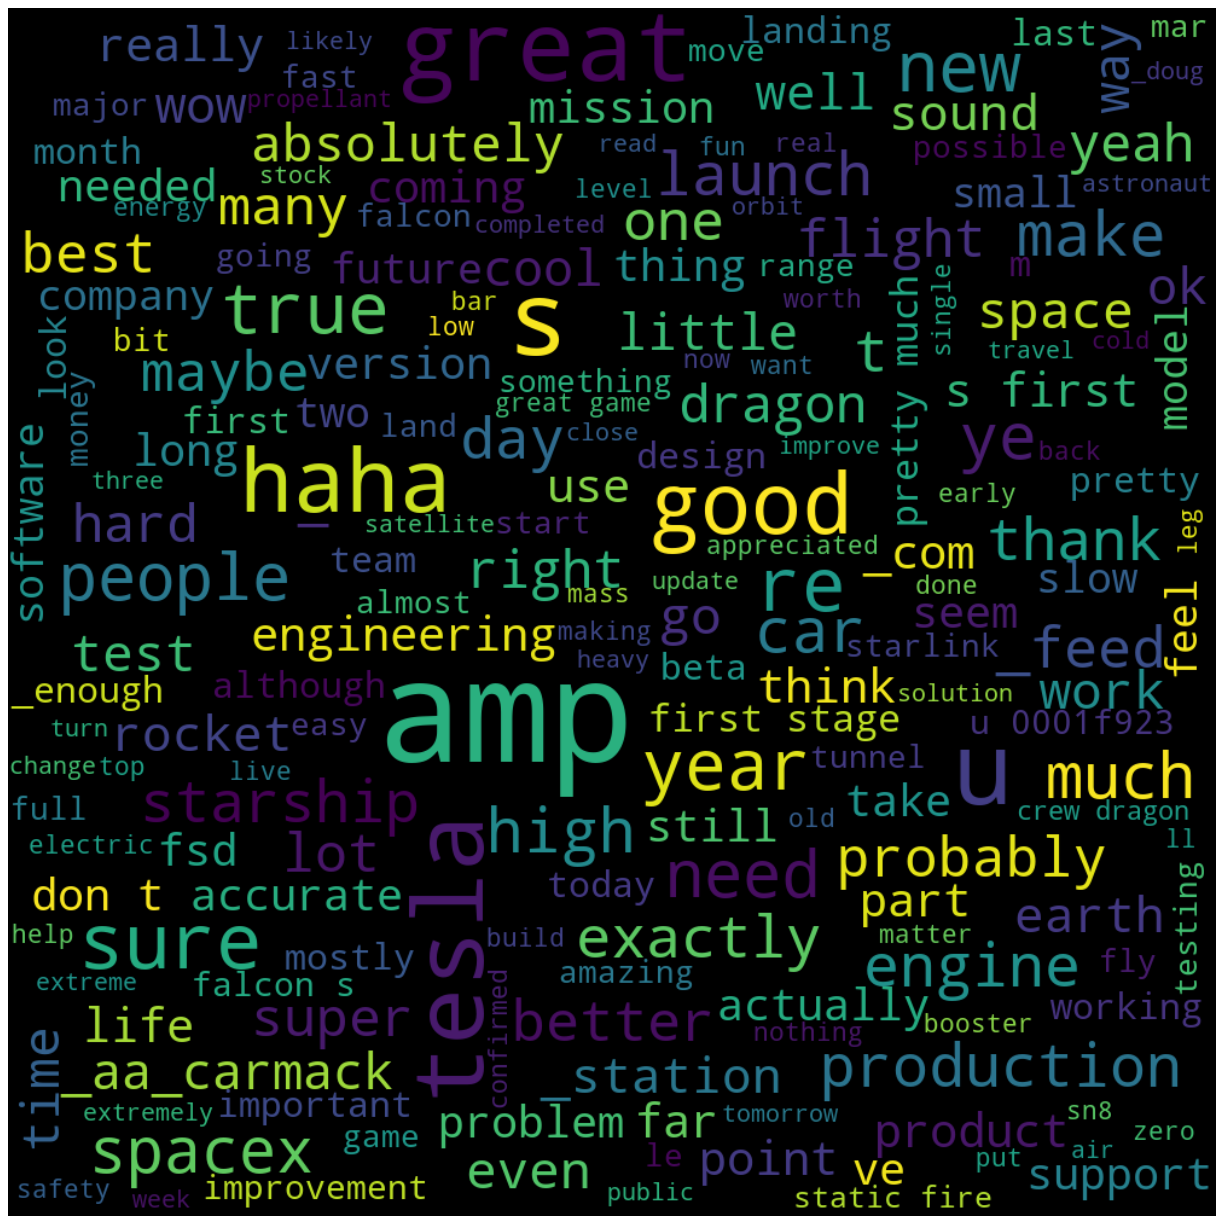

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in processed_data["tweets"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiments', ylabel='Density'>

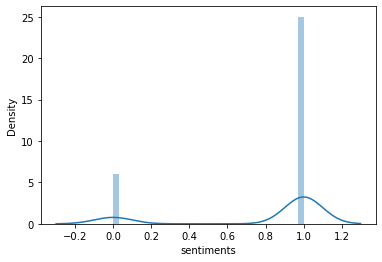

In [40]:
sns.distplot(processed_data['sentiments'])

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiments'>

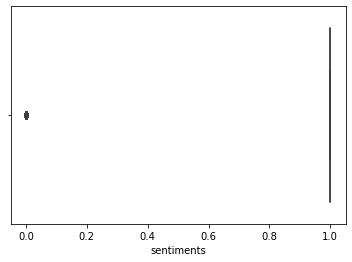

In [41]:
sns.boxplot(processed_data['sentiments'])

## Vectorization

### Converting Words into Vectors

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3))
cv.fit(processed_data['tweets'])

CountVectorizer(ngram_range=(1, 3))

In [44]:
X_train = cv.transform(processed_data['tweets'])

In [45]:
print(X_train.shape)

(990, 13379)


In [46]:
X_train

<990x13379 sparse matrix of type '<class 'numpy.int64'>'
	with 18051 stored elements in Compressed Sparse Row format>

In [47]:
target = processed_data['sentiments'].values

In [48]:
target

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Model Building

In [49]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [50]:
classifier.fit(X_train,target)

MultinomialNB()

In [51]:
test_Text,test_analysis = Clean_Text(test)

In [52]:
data_test = {'tweets':test_Text,'sentiments':test_analysis}
final_test_data = pd.DataFrame(data_test)

In [53]:
final_test_data

,tweets,sentiments
0,song whistle stranger night,Positive
1,great song,Positive
2,"yes, long",Negative
3,"second there, thought pic thanos haha",Positive
4,"_xd going say �sim!�, seemed obvious haha",Positive
...,...,...
105,_soichi: spacex nasa crew1 finished final dres...,Positive
106,important distinction,Positive
107,"one person tesla (out 60,000) hospitalized ser...",Negative
108,brave starhopper carried day,Positive


In [54]:
X_test = cv.transform(final_test_data['tweets'])

In [55]:
X_test

<110x13379 sparse matrix of type '<class 'numpy.int64'>'
	with 608 stored elements in Compressed Sparse Row format>

In [56]:
X_test.shape

(110, 13379)

In [57]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [58]:
final_test_data['sentiments'] = labelencoder.fit_transform(final_test_data['sentiments'])

In [59]:
final_test_data

,tweets,sentiments
0,song whistle stranger night,1
1,great song,1
2,"yes, long",0
3,"second there, thought pic thanos haha",1
4,"_xd going say �sim!�, seemed obvious haha",1
...,...,...
105,_soichi: spacex nasa crew1 finished final dres...,1
106,important distinction,1
107,"one person tesla (out 60,000) hospitalized ser...",0
108,brave starhopper carried day,1


In [60]:
actual_values = final_test_data['sentiments'].values

In [61]:
actual_values

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, actual_values))

0.7909090909090909


# Business Problem 2:
     Extract reviews of any product from ecommerce website and amazon

In [2]:
!pip install selenium

In [3]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DIKSHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DIKSHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DIKSHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

 Connecting to Amazon and download reviews

In [5]:
oneplus_reviews=[]

In [6]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

Downloading review from Amazon.in for the phone OnePlus 7

In [7]:
oneplus_reviews = list(set(oneplus_reviews))

Cleaning the text

In [8]:
txt_upd = ' '.join(oneplus_reviews)

In [9]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [10]:
text_tokens = word_tokenize(txt_upd)

In [11]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

Create the DF

In [12]:
tf = TfidfVectorizer()

In [13]:
text_tf = tf.fit_transform(tokens_without_sw)

In [14]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [15]:
df

,adapter,adaptor,added,always,amazing,amazon,ambiance,amoeld,amoled,android,...,work,worried,worst,would,wounds,writing,year,years,youtube,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
word_list = ' '.join(df)

In [17]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

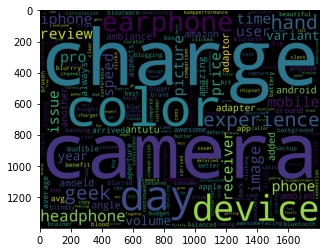

In [18]:
plt.imshow(wordcloud)

# Emotion Mining

In [19]:
with open("C:/Users/DIKSHA/Downloads/positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [20]:
positive_words = positive_words[35:]

In [21]:
with open("C:/Users/DIKSHA/Downloads/negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [22]:
negative_words = negative_words[35:]

In [23]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [24]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [25]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [26]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

# Conclusion

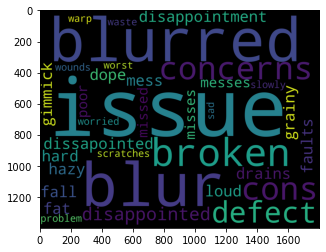

In [27]:
plt.imshow(wordcloud_neg)

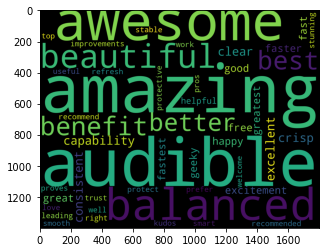

In [28]:
plt.imshow(wordcloud_pos)